## Final Project

+ You can form teams of up to 4 people

+ Consider the following 5 stocks:
    1. Apple(AAPL)
    2. AT&T (T)
    3. NETFLIX (NFLX)
    4. General Electric (GE)
    5. Boeing (BA)

+ Using Yahoo finance, for each of these stocks, consider statements under the “Conversation” tab that are at most 5 days old. Create a lexicon (dictionary) of words that show positive sentiments and negative sentiments.

+ Consider the vector (stock, feature, time, sentiment) where:
    * Stock = AAPL, T, NFLX, GE, BA
    * Feature = can be important items such as sales, dividend, grounding
    * Time = in days where 0 is today, 1, yesterday, 4 is five days ago
    * Sentiment = Positive (1), Negative (-1), Neutral (0).

+ Determine this vector for all the statements of the “Conversations” that are about that particular stock and put them in an EXCEL sheet.

+ Do a pie chart of sentiment for each of the 5 days and based on that determine whether the sentiment about the stock is positive, negative, or neutral.

+ Plot the sentiment for the past five days vs Open, Close, High, Low, and Volume of the stock.

+ Does there seem to be a correlation between sentiment and the price, volume and volatility.

+ You can also perform other analysis that is of interest to the group
    * I will ask the team to present its analysis about one of the stocks.
    * The team will submit its work that should include the name of team members.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import pandas_datareader as pdr
import datetime

In [2]:
stocks = ['AAPL', 'T', 'NFLX', 'GE', 'BA']
# stocks = 'FB'
start = datetime.datetime(2019,12, 2)
end = datetime.datetime(2019,12, 8)
flag = 0
for stock in stocks:
    if flag == 0:
        price_df = pdr.DataReader(stock, 'yahoo',start,end)
        price_df = price_df[['Adj Close']]
        
        flag = 1
    else:       
        price_df = pd.merge(price_df, pdr.DataReader(stock, 'yahoo',start,end)[['Adj Close']], on='Date')
price_df.columns = stocks

In [3]:
stocks_ret = price_df.pct_change(1) 
stocks_ret = stocks_ret[1:]
stocks_cov = stocks_ret.cov()
stocks_ret.head()

,AAPL,T,NFLX,GE,BA
Date,,,,,
2019-12-03,-0.017830,0.006163,-0.012355,-0.015233,-0.008728
2019-12-04,0.008826,0.014647,-0.006010,-0.008189,-0.009202
2019-12-05,0.014671,0.002362,-0.004798,-0.010092,-0.009059
2019-12-06,0.019316,0.000262,0.014825,0.028730,0.024329


In [4]:
stock_df = pdr.DataReader('AAPL', 'yahoo',start,end)
stock_df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-02,268.250000,263.450012,267.269989,264.160004,23621800,264.160004
2019-12-03,259.529999,256.290009,258.309998,259.450012,28607600,259.450012
2019-12-04,263.309998,260.679993,261.070007,261.739990,16795400,261.739990
2019-12-05,265.890015,262.730011,263.790009,265.579987,18606100,265.579987
2019-12-06,271.000000,267.510010,267.480011,270.709991,26547493,270.709991


In [17]:
sent_df = pd.read_csv('News.csv')
sent_df = sent_df.set_index('Date')
df = pd.concat([stock_df, sent_df], axis=1)
# df.reset_index(drop=False)

date1 = datetime.datetime(2019,12, 2)
date2 = datetime.datetime(2019,12, 3)
date3 = datetime.datetime(2019,12, 4)
date4 = datetime.datetime(2019,12, 5)
date5 = datetime.datetime(2019,12, 6)
Dates = [date1,date2, date3, date4, date5]
days = [1, 2, 3, 4, 5]

### Plot the sentiment for the past five days vs Open, Close, High, Low, and Volume of the stock.

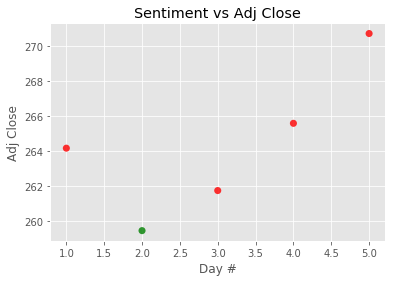

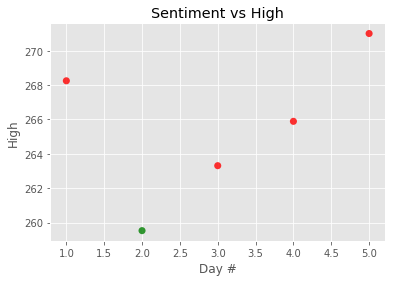

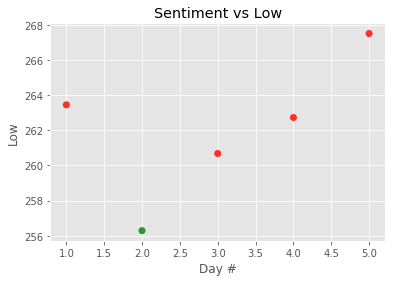

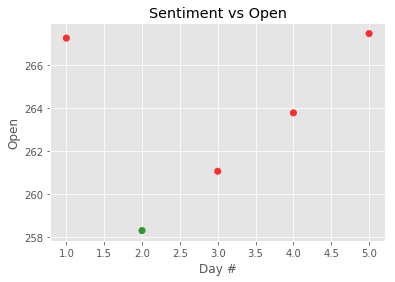

In [24]:
plt.style.use('ggplot')

colors = {-1:'red', 0:'blue', 1:'green'}


def sent_plot(item):
    plt.scatter(days, df[item],s=50, c=df['Sentiment'].apply(lambda x: colors[x]), alpha=0.8, label='close', edgecolor='none')
    plt.ylabel(item)
    plt.xlabel('Day #')
    plt.title('Sentiment vs {}'.format(item))
    plt.show()

sent_plot('Adj Close')
sent_plot('High')
sent_plot('Low')
sent_plot('Open')


# colors = {-1:'red', 0:'blue', 1:'green'}
# plt.scatter(x='Low', y='Adj Close', c=df['Sentiment'].apply(lambda x: colors[x]))

# plt.scatter(df['Date'], df['Adj Close'], c=df['Sentiment'].apply(lambda x: colors[x]))

### Volitatily 

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import datetime as dt
import urllib.request
import random
import arrow
import json

In [32]:
# use proxies as spiders
def url_openproxy(url):
    req=urllib.request.Request(url)
    req.add_header('User-Agent', 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36')
    
    proxies=['119.6.144.70:81','111.1.36.9:80','203.144.144.162:8080']
    proxy=random.choice(proxies)
    proxy_sup=urllib.request.ProxyHandler({'http':proxy})
    opener=urllib.request.build_opener(proxy_sup)
    urllib.request.install_opener(opener)
    
    response=urllib.request.urlopen(url)
    html=response.read()
   
    return html 

# retrieving high frequency data
def get_quote_data(symbol='SBIN.NS', data_range='1d', data_interval='1m'):
    res = url_openproxy('https://query1.finance.yahoo.com/v8/finance/chart/{symbol}?range={data_range}&interval={data_interval}'.format(**locals()))
    data = json.loads(res.decode('utf-8'))
    body = data['chart']['result'][0]    
    dt = pd.Series(map(lambda x: arrow.get(x).to('EST').datetime.replace(tzinfo=None), body['timestamp']), name='Datetime')
    df = pd.DataFrame(body['indicators']['quote'][0], index=dt)
    dg = pd.DataFrame(body['timestamp'])    
    df = df.loc[:, ('open', 'high', 'low', 'close', 'volume')]
    df.dropna(inplace=True)     #removing NaN rows
    df.columns = ['OPEN', 'HIGH','LOW','CLOSE','VOLUME']    #Renaming columns in pandas
    
    return df

In [53]:
# obtain S&P500 30-minute price and volume
df =get_quote_data('^GSPC', '5d', '30m')
df.index = df.index.date
df = df.set_index(pd.to_datetime(df.index))
df.head()

,OPEN,HIGH,LOW,CLOSE,VOLUME
2019-12-02,3143.850098,3144.260010,3129.570068,3129.639893,139724890
2019-12-02,3129.699951,3129.699951,3117.330078,3120.949951,150122343
2019-12-02,3121.100098,3121.820068,3111.929932,3114.110107,124817359
2019-12-02,3114.060059,3117.149902,3110.780029,3116.169922,100600610
2019-12-02,3116.199951,3119.260010,3111.780029,3118.669922,86501377


In [71]:
date1 = datetime.datetime(2019,12, 2)
date2 = datetime.datetime(2019,12, 3)
date3 = datetime.datetime(2019,12, 4)
date4 = datetime.datetime(2019,12, 5)
date5 = datetime.datetime(2019,12, 6)
dates = [date1,date2, date3, date4, date5]

vol = float(df.loc[df.index == datetime.datetime(2019,12, 2)][['CLOSE']].std())
vols = []

for date in dates:
    vol = float(df.loc[df.index == date][['CLOSE']].std())
    vols.append(vol)
print(vols)


[4.433309819277682, 5.135535176432929, 1.806002382936145, 2.912904038928642, 1.9047517520879371]


In [44]:
df.loc[df.index == datetime.datetime(2019,12, 2)]

,OPEN,HIGH,LOW,CLOSE,VOLUME
